#1. Determinar que SGD (Objetivo Desarrollo Sostenible en español)
## Objetivo: Garantizar una educación inclusiva, equitativa y de calidad y promover oportunidades de aprendizaje durante toda la vida para todos.
##Hipotesis: Mejores profesores garantiza una educacion de calidad.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from IPython.utils import encoding
from collections import defaultdict
from sklearn.cluster import KMeans
import matplotlib.cm as cm
from google.colab import drive
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
dfedu = pd.read_csv("/content/drive/MyDrive/Proyecto/Educacion2.csv", skiprows=4)

In [3]:
dfedu

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,Población entre 15 y 64 años de edad (% del to...,SP.POP.1564.TO.ZS,54.495678,54.588701,54.585630,54.674206,54.873448,55.181477,...,69.795393,69.620827,69.352325,69.027743,68.681269,68.320569,67.962515,67.712003,67.657094,NaN
1,Aruba,ABW,Población entre 0 y 14 años de edad (% del total),SP.POP.0014.TO.ZS,43.131043,42.949419,42.852732,42.661157,42.359159,41.936664,...,19.348756,19.045505,18.799607,18.571721,18.334859,18.069771,17.767339,17.351022,16.799407,NaN
2,Aruba,ABW,"Desempleo, total (% de la población activa tot...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Aruba,ABW,"Desempleo, varones (% de la población activa m...",SL.UEM.TOTL.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aruba,ABW,"Desempleo, mujeres (% de la población activa f...",SL.UEM.TOTL.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43087,Zimbabwe,ZWE,"Tasa de alfabetización, mujeres adultas (% de ...",SE.ADT.LITR.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,88.283829,NaN,NaN,NaN,NaN,NaN,NaN,90.900002,NaN
43088,Zimbabwe,ZWE,"Tasa de alfabetización, total de jóvenes (% de...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,90.428123,NaN,NaN,NaN,NaN,NaN,NaN,90.699997,NaN
43089,Zimbabwe,ZWE,"Tasa de alfabetización, varones jóvenes (% de ...",SE.ADT.1524.LT.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,87.591858,NaN,NaN,NaN,NaN,NaN,NaN,86.800003,NaN
43090,Zimbabwe,ZWE,Proporción de mujeres con respecto a varones d...,SE.ADT.1524.LT.FM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.060060,NaN,NaN,NaN,NaN,NaN,NaN,1.081480,NaN


In [4]:
dfedu.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       'Unnamed: 66'],
      dtype='object')

In [5]:
def get_years():
  years= []
  for i in range(1960,2022):
    years.append(str(i))
  return years

In [6]:
# Convertir columnas a filas
dfedu2 = dfedu.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']
               ,value_vars=get_years(),var_name='Year',value_name='Valor')
# Convertir string a entero
dfedu2['Year'] = dfedu2['Year'].astype(int)

In [7]:
dfedu2.sample(5)

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Valor
353718,Alemania,DEU,"Proporción alumnos-maestro, nivel secundario",SE.SEC.ENRL.TC.ZS,1968,NaN
898489,Seychelles,SYC,"Nivel de instrucción, al menos nivel de maestr...",SE.TER.CUAT.MS.FE.ZS,1980,NaN
848888,Perú,PER,Probability of dying among adolescents ages 15...,SH.DYN.1519,1979,NaN
575194,Guatemala,GTM,"Niños que no asisten a la escuela, nivel prima...",SE.PRM.UNER.MA,1973,NaN
2623881,América Latina y el Caribe (BIRF y la AIF),TLA,"Inscripción escolar, nivel primario, mujeres (...",SE.PRM.ENRR.FE,2020,105.422333


##2. Limpiar los datos

In [8]:
# Eliminar NaN
dfedu2.fillna(0.,inplace=True)
dfedu2.sample(5)

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Valor
2107371,Asia meridional (BIRF y la AIF),TSA,"Educación de nivel secundario, alumnos en prog...",SE.SEC.ENRL.GC,2008,1.260000e+08
2117842,Chile,CHL,"Gasto público en educación, total (% del gasto...",SE.XPD.TOTL.GB.ZS,2009,1.703561e+01
1894706,Viet Nam,VNM,"Alumnos de mayor edad, nivel primario, (% de m...",SE.PRM.OENR.ZS,2003,0.000000e+00
478587,Bolivia,BOL,"Nivel de instrucción, al menos nivel de doctor...",SE.TER.CUAT.DO.MA.ZS,1971,0.000000e+00
140403,Zona del Euro,EMU,Perseverancia en la escuela hasta el último gr...,SE.PRM.PRSL.FE.ZS,1963,0.000000e+00


In [9]:
dftemp1 = dfedu2[['Country Name','Country Code','Indicator Code','Year','Valor']]
dftemp1

,Country Name,Country Code,Indicator Code,Year,Valor
0,Aruba,ABW,SP.POP.1564.TO.ZS,1960,54.495678
1,Aruba,ABW,SP.POP.0014.TO.ZS,1960,43.131043
2,Aruba,ABW,SL.UEM.TOTL.ZS,1960,0.000000
3,Aruba,ABW,SL.UEM.TOTL.MA.ZS,1960,0.000000
4,Aruba,ABW,SL.UEM.TOTL.FE.ZS,1960,0.000000
...,...,...,...,...,...
2671699,Zimbabwe,ZWE,SE.ADT.LITR.FE.ZS,2021,90.900002
2671700,Zimbabwe,ZWE,SE.ADT.1524.LT.ZS,2021,90.699997
2671701,Zimbabwe,ZWE,SE.ADT.1524.LT.MA.ZS,2021,86.800003
2671702,Zimbabwe,ZWE,SE.ADT.1524.LT.FM.ZS,2021,1.081480


In [10]:
# Convertir filas a columnas de csv Educacion
dfedu2 = dftemp1.pivot(index=['Country Name','Country Code','Year'],columns=['Indicator Code']
                    ,values='Valor').reset_index()

In [11]:
dfedu2

Indicator Code,Country Name,Country Code,Year,SE.ADT.1524.LT.FE.ZS,SE.ADT.1524.LT.FM.ZS,SE.ADT.1524.LT.MA.ZS,SE.ADT.1524.LT.ZS,SE.ADT.LITR.FE.ZS,SE.ADT.LITR.MA.ZS,SE.ADT.LITR.ZS,...,SH.DYN.1014,SH.DYN.1519,SH.DYN.2024,SL.TLF.TOTL.FE.ZS,SL.TLF.TOTL.IN,SL.UEM.TOTL.FE.ZS,SL.UEM.TOTL.MA.ZS,SL.UEM.TOTL.ZS,SP.POP.0014.TO.ZS,SP.POP.1564.TO.ZS
0,0.0,AFE,1960,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,44.200016,52.827416
1,0.0,AFE,1961,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,44.285569,52.760490
2,0.0,AFE,1962,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,44.381992,52.682676
3,0.0,AFE,1963,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,44.495098,52.586510
4,0.0,AFE,1964,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,44.609810,52.485520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16487,África al sur del Sahara (excluido altos ingre...,SSA,2017,72.409737,0.91895,78.795952,75.607590,57.760071,71.799881,64.682961,...,6.774837,10.842841,13.526936,46.525923,407637344.0,6.984642,5.983844,6.450222,42.920932,54.076804
16488,África al sur del Sahara (excluido altos ingre...,SSA,2018,73.737961,0.92618,79.615089,76.642967,59.505550,72.990646,66.135330,...,6.625420,10.569206,13.258128,46.540275,419603778.0,6.856646,6.119354,6.463283,42.730556,54.246116
16489,África al sur del Sahara (excluido altos ingre...,SSA,2019,74.297813,0.92933,79.948143,77.115051,60.498981,73.800751,67.055687,...,6.507418,10.317541,13.070986,46.563162,432225350.0,6.823550,6.375952,6.585332,42.522111,54.432296
16490,África al sur del Sahara (excluido altos ingre...,SSA,2020,74.606010,0.93227,80.026299,77.319443,60.879021,73.840340,67.270607,...,6.351901,10.031330,12.866300,46.290503,434621184.0,7.481607,7.052058,7.251849,42.296712,54.646210


In [12]:
dfedu2.columns

Index(['Country Name', 'Country Code', 'Year', 'SE.ADT.1524.LT.FE.ZS',
       'SE.ADT.1524.LT.FM.ZS', 'SE.ADT.1524.LT.MA.ZS', 'SE.ADT.1524.LT.ZS',
       'SE.ADT.LITR.FE.ZS', 'SE.ADT.LITR.MA.ZS', 'SE.ADT.LITR.ZS',
       ...
       'SH.DYN.1014', 'SH.DYN.1519', 'SH.DYN.2024', 'SL.TLF.TOTL.FE.ZS',
       'SL.TLF.TOTL.IN', 'SL.UEM.TOTL.FE.ZS', 'SL.UEM.TOTL.MA.ZS',
       'SL.UEM.TOTL.ZS', 'SP.POP.0014.TO.ZS', 'SP.POP.1564.TO.ZS'],
      dtype='object', name='Indicator Code', length=165)

In [13]:
from collections import defaultdict
res = defaultdict(dict)
corr = dfedu2.corr().replace(1, -1)
names = list(corr)

for name in names:
    idx = corr[name].argmax()
    max_pairwise_name = names[idx]
    res[name][max_pairwise_name] = corr.loc[max_pairwise_name, name]

res

defaultdict(dict,
            {'Year': {'SE.COM.DURS': 0.7508791262633507},
             'SE.ADT.1524.LT.FE.ZS': {'SE.ADT.1524.LT.ZS': 0.9812093299784681},
             'SE.ADT.1524.LT.FM.ZS': {'SE.ADT.1524.LT.MA.ZS': 0.9952694444372022},
             'SE.ADT.1524.LT.MA.ZS': {'SE.ADT.1524.LT.ZS': 0.9960643126068031},
             'SE.ADT.1524.LT.ZS': {'SE.ADT.1524.LT.MA.ZS': 0.9960643126068031},
             'SE.ADT.LITR.FE.ZS': {'SE.ADT.LITR.ZS': 0.9952646476669317},
             'SE.ADT.LITR.MA.ZS': {'SE.ADT.LITR.ZS': 0.9964085240989059},
             'SE.ADT.LITR.ZS': {'SE.ADT.LITR.MA.ZS': 0.9964085240989059},
             'SE.COM.DURS': {'Year': 0.7508791262633507},
             'SE.ENR.PRIM.FM.ZS': {'SE.PRM.ENRR.FE': 0.9737839359022987},
             'SE.ENR.PRSC.FM.ZS': {'SE.ENR.SECO.FM.ZS': 0.9629241101080798},
             'SE.ENR.SECO.FM.ZS': {'SE.ENR.PRSC.FM.ZS': 0.9629241101080798},
             'SE.ENR.TERT.FM.ZS': {'SE.TER.ENRR.FE': 0.7643246141749901},
             'SE.PR

#3. Escoger los indicadores del Banco Mundial que necesita de acuerdo al Objetivo escogido en el paso 1
# Educación de nivel primario, maestros "SE.PRM.TCHR"
# Educación de nivel primario, alumnos "SE.PRM.ENRL"
# Gasto público en educación, total (% del PIB) "SE.XPD.TOTL.GD.ZS"

In [14]:
dfedu4 = dfedu2[['SE.PRM.TCHR','SE.PRM.ENRL','Year','SE.XPD.TOTL.GD.ZS']]
print('Total Row : ', len(dfedu2))

Total Row :  16492


In [15]:
dfedu4

Indicator Code,SE.PRM.TCHR,SE.PRM.ENRL,Year,SE.XPD.TOTL.GD.ZS
0,0.0,0.0,1960,0.000000
1,0.0,0.0,1961,0.000000
2,0.0,0.0,1962,0.000000
3,0.0,0.0,1963,0.000000
4,0.0,0.0,1964,0.000000
...,...,...,...,...
16487,4670931.0,170472064.0,2017,3.775150
16488,4856996.0,175808704.0,2018,3.696440
16489,4872042.5,179767168.0,2019,3.586115
16490,4981476.5,183259104.0,2020,3.443020


#4. Hacer el análisis exploratorio de las variables (indicadores) y el análisis correlacional. Si algún indicador no se correlaciona puede volver al paso 2 y seleccionar otros. Haga las anotaciones para su reporte, esta información sirve para el análisis.

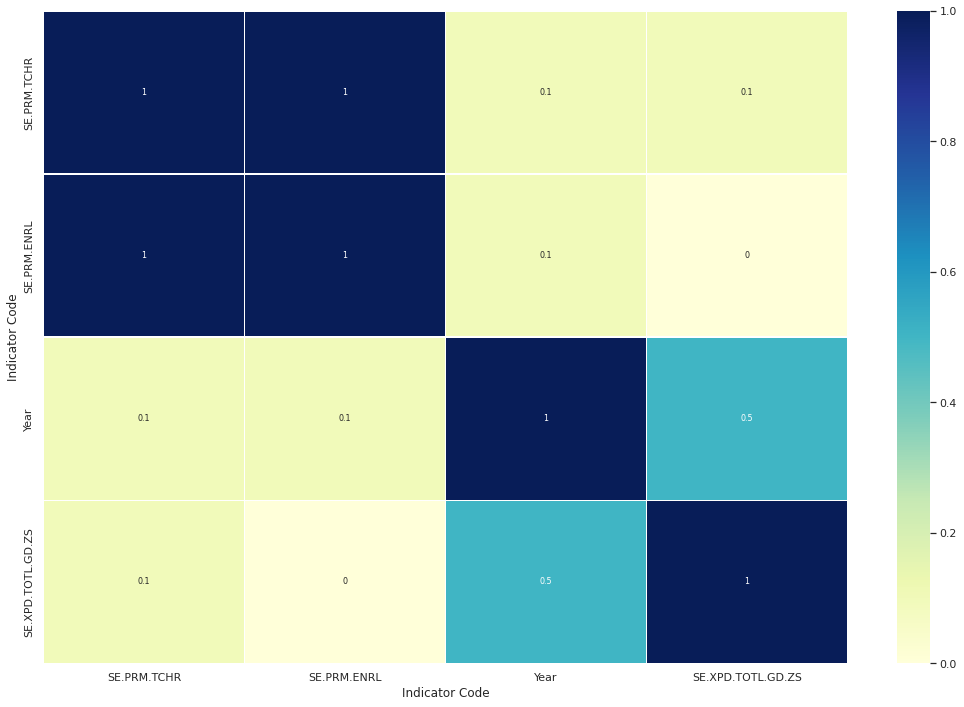

In [16]:
mcor = dfedu4.corr().round(1)
sb.set(rc={'figure.figsize':(18,12)})
mcplot = sb.heatmap(mcor, cmap="YlGnBu",annot=True,linewidths=0.4, annot_kws={"size":8})

#5. Realizar el Ajuste de Escalas si es necesario.

In [18]:
sc_df = StandardScaler()
df_std = sc_df.fit_transform(dfedu4.astype(float))
df_std

array([[-0.26553091, -0.27410958, -1.70433621, -0.65607904],
       [-0.26553091, -0.27410958, -1.64845633, -0.65607904],
       [-0.26553091, -0.27410958, -1.59257646, -0.65607904],
       ...,
       [ 1.47846209,  2.15723332,  1.59257646,  0.85087852],
       [ 1.51763501,  2.2044616 ,  1.64845633,  0.79074717],
       [-0.26553091, -0.27410958,  1.70433621, -0.65607904]])

#6. Determinar el K adecuado usando la técnica de análisis del codo o la técnica de la silueta.

In [19]:
print(dfedu4.groupby('Year').size())

Year
1960    266
1961    266
1962    266
1963    266
1964    266
       ... 
2017    266
2018    266
2019    266
2020    266
2021    266
Length: 62, dtype: int64


<ipython-input-20-308b6c9be7be>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dfedu4.drop(['Year'],1).hist()


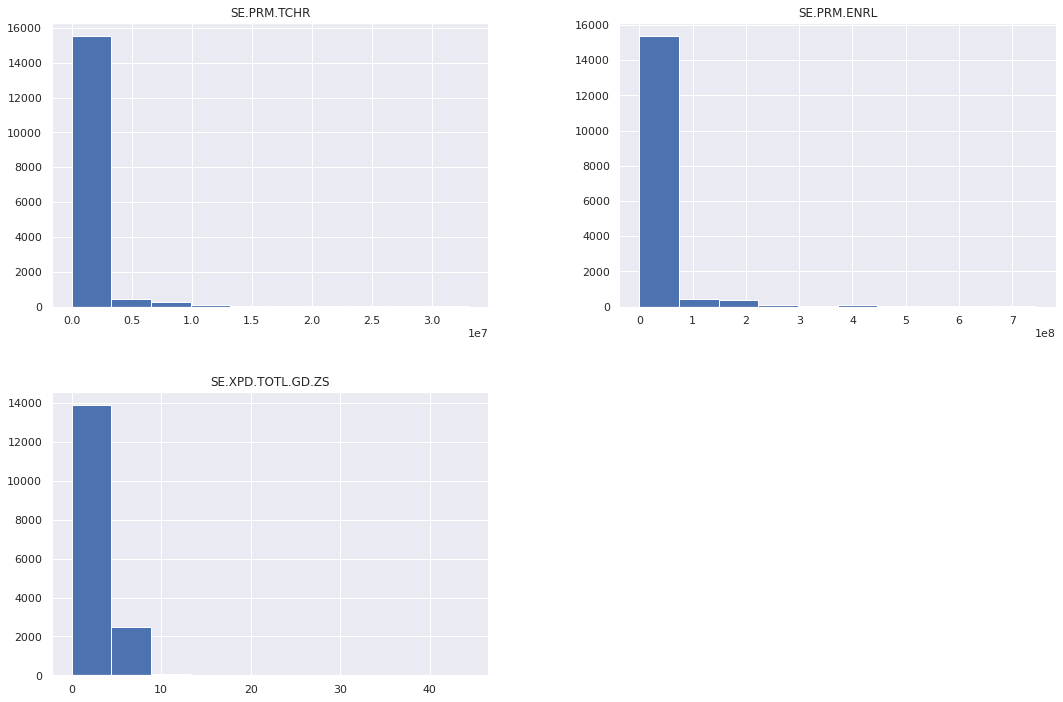

In [20]:
dfedu4.drop(['Year'],1).hist()
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


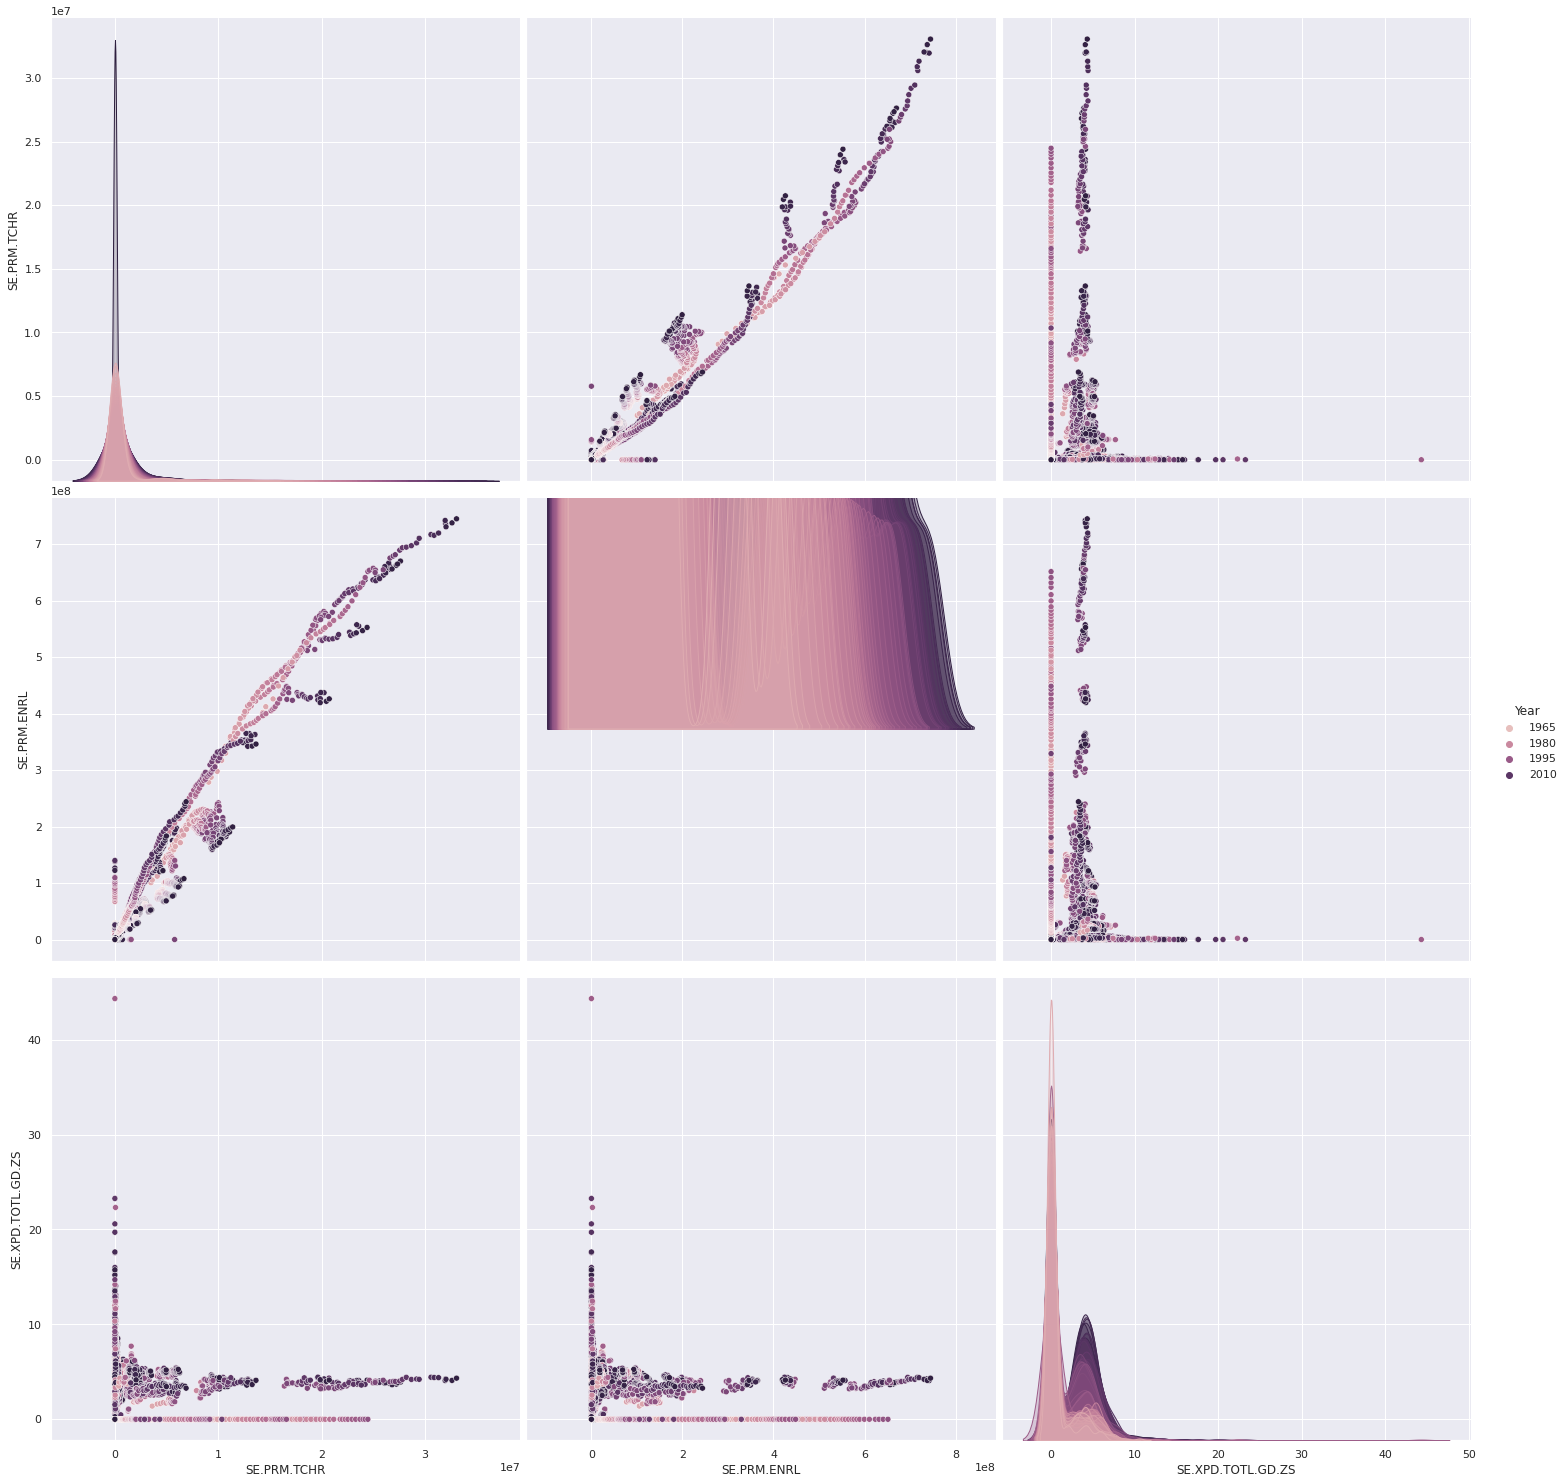

In [21]:
sb.pairplot(dfedu4.dropna(), hue='Year',size=7,vars=["SE.PRM.TCHR","SE.PRM.ENRL","SE.XPD.TOTL.GD.ZS"],kind='scatter')

In [22]:
X = np.array(dfedu4[["SE.PRM.TCHR","SE.PRM.ENRL","SE.XPD.TOTL.GD.ZS"]])
y = np.array(dfedu4['Year'])
X.shape

(16492, 3)

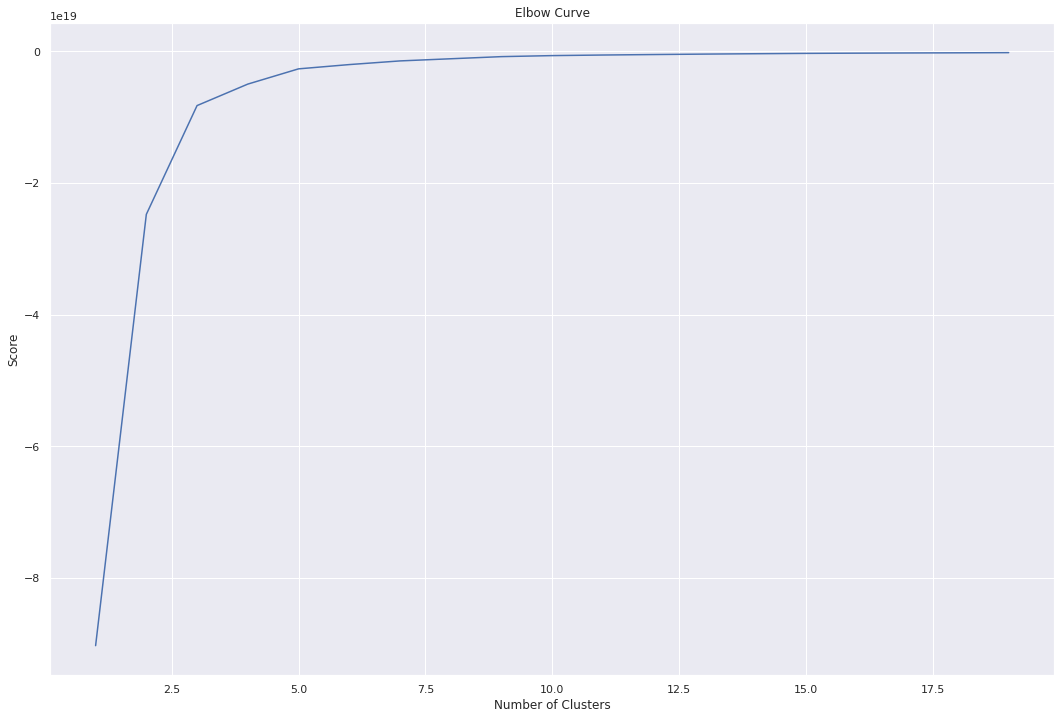

In [23]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

#7. Crear el modelo K-Means con el K adecuado.

In [26]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[7.19659738e+04 1.98064368e+06 1.52642438e+00]
 [1.36554273e+07 3.91276452e+08 1.48813610e+00]
 [6.65672853e+06 1.82650727e+08 1.85244062e+00]
 [2.26329692e+07 5.93227946e+08 2.50996342e+00]
 [2.53585693e+06 6.90208460e+07 1.81528551e+00]]


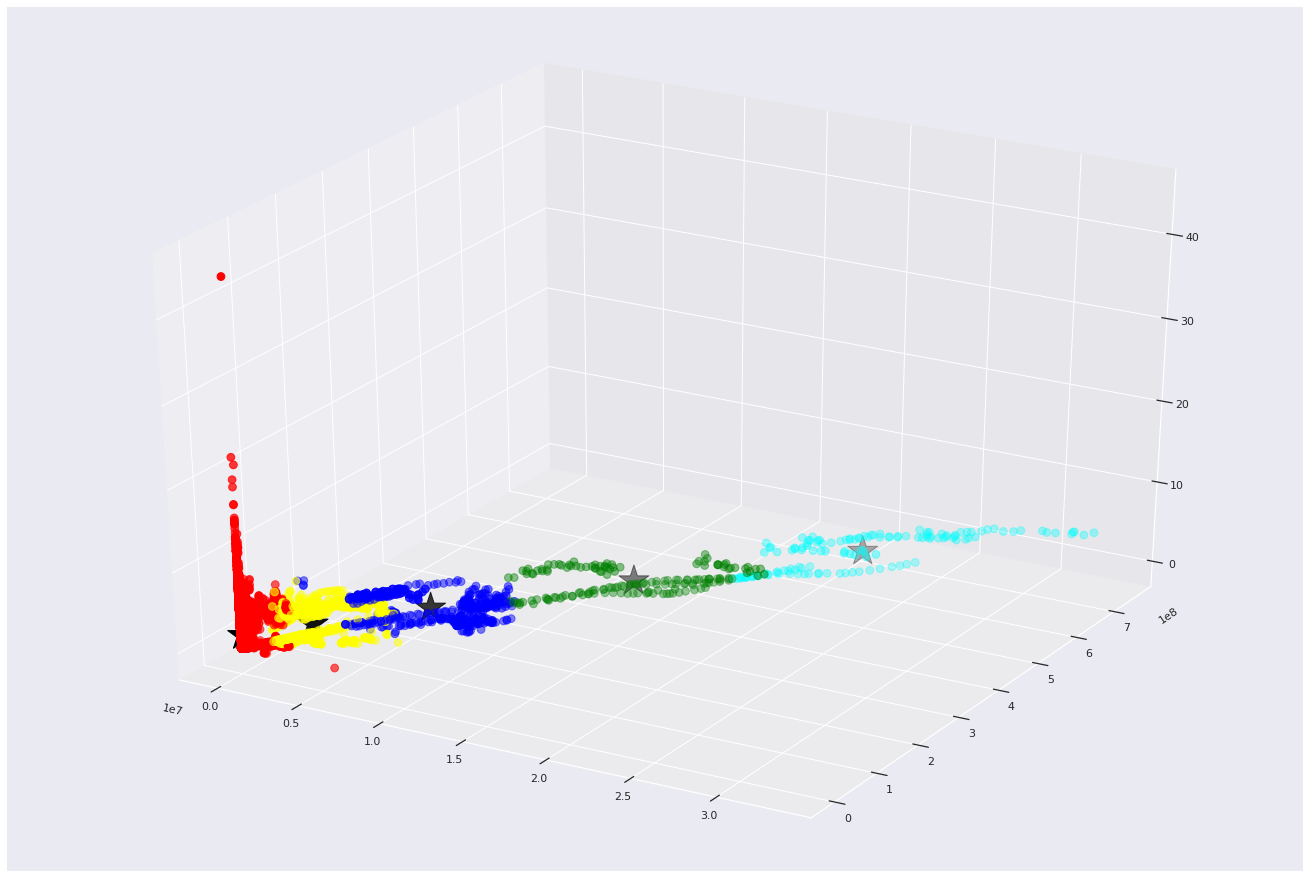

In [27]:
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c="black", s=1000)

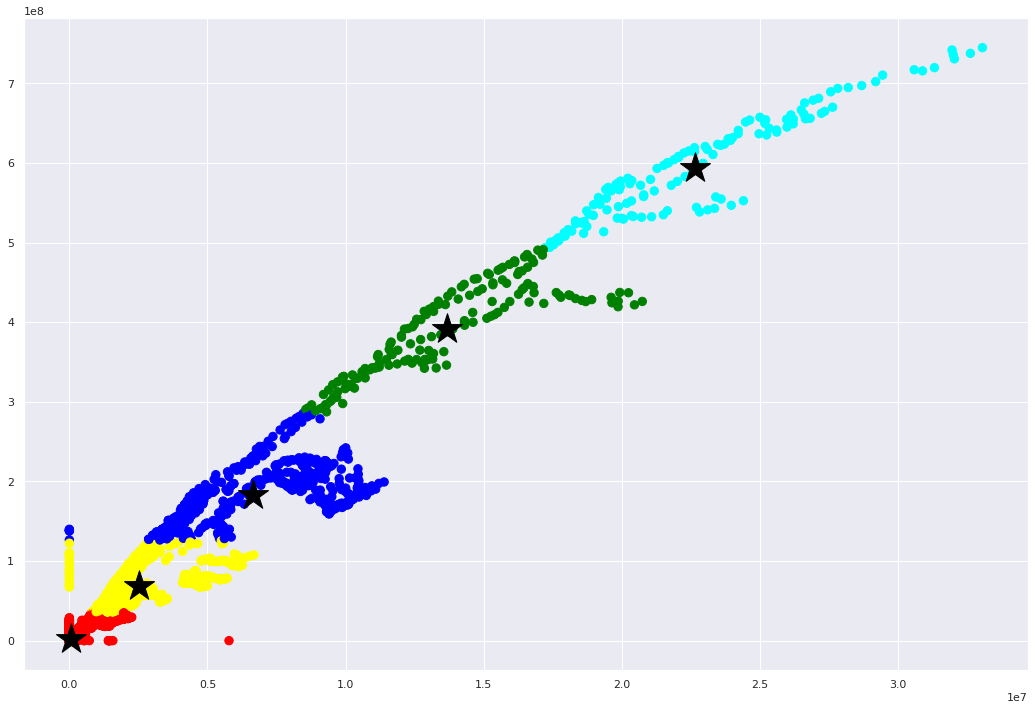

In [28]:
# Getting the values and plotting it
f1 = dfedu4['SE.PRM.TCHR'].values
f2 = dfedu4['SE.PRM.ENRL'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c="black", s=1000)
plt.show()


For n_clusters = 2 The average silhouette_score is : 0.7198936056477578
For n_clusters = 3 The average silhouette_score is : 0.48540844601539596
For n_clusters = 4 The average silhouette_score is : 0.45429979645003093
For n_clusters = 5 The average silhouette_score is : 0.47457768857562926
For n_clusters = 6 The average silhouette_score is : 0.46558527316423587
For n_clusters = 10 The average silhouette_score is : 0.4584235857932177


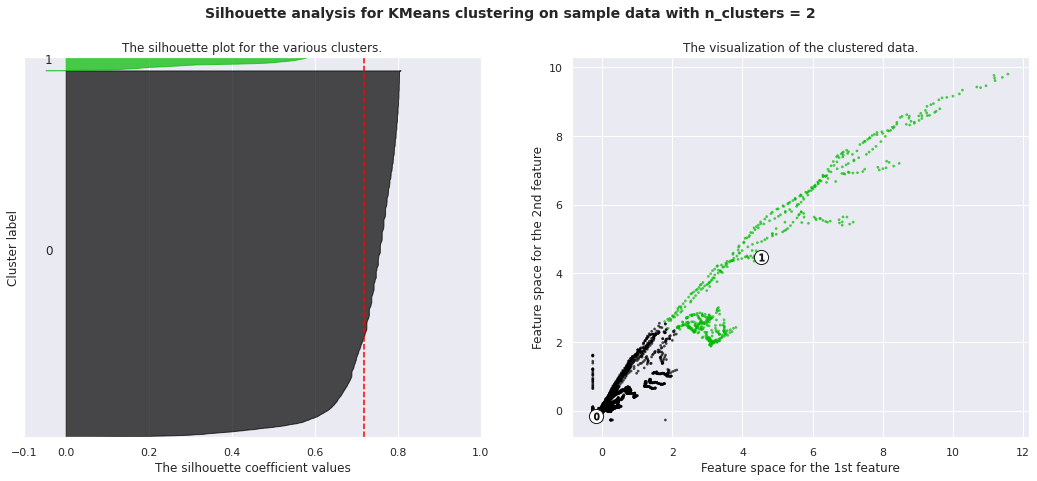

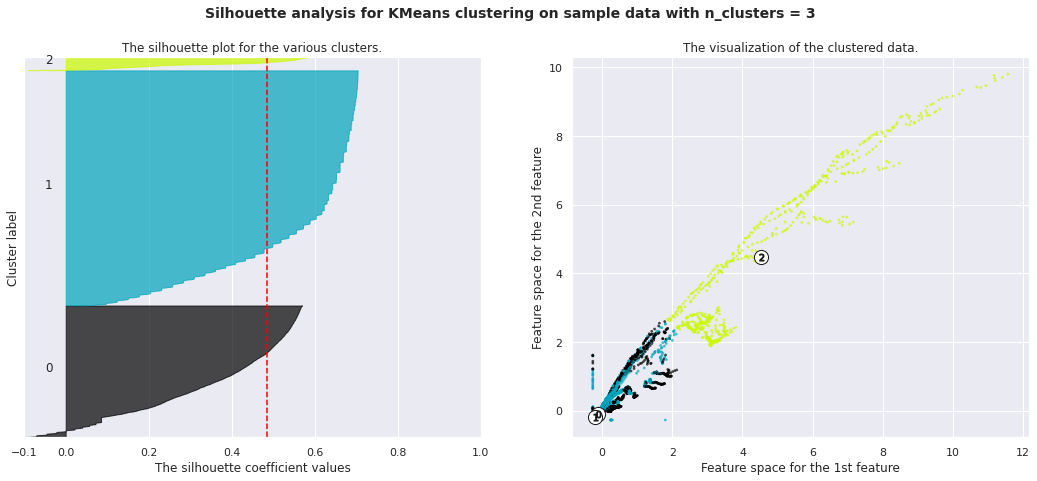

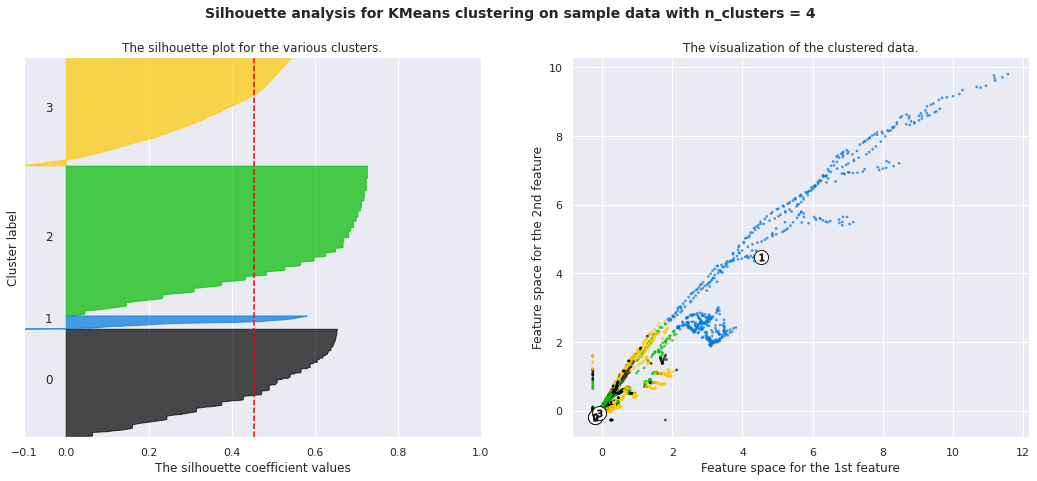

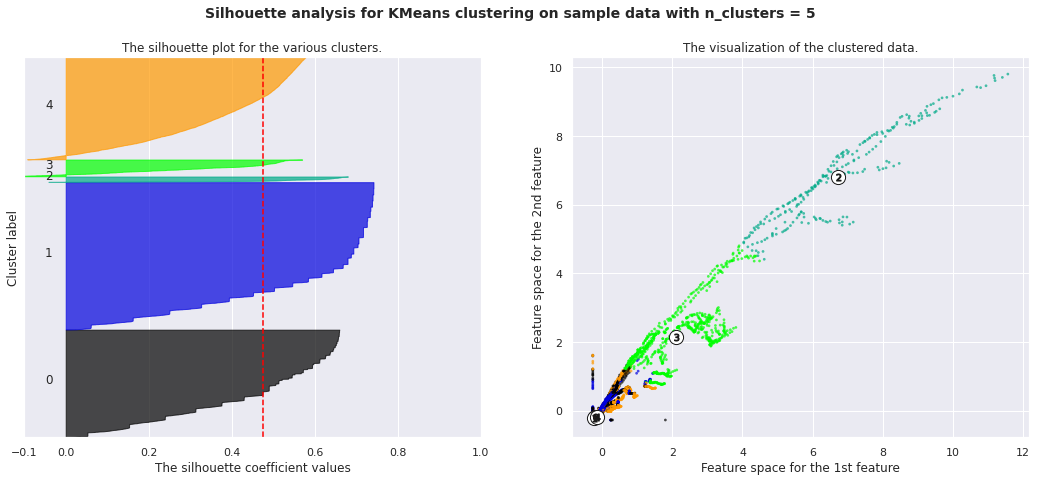

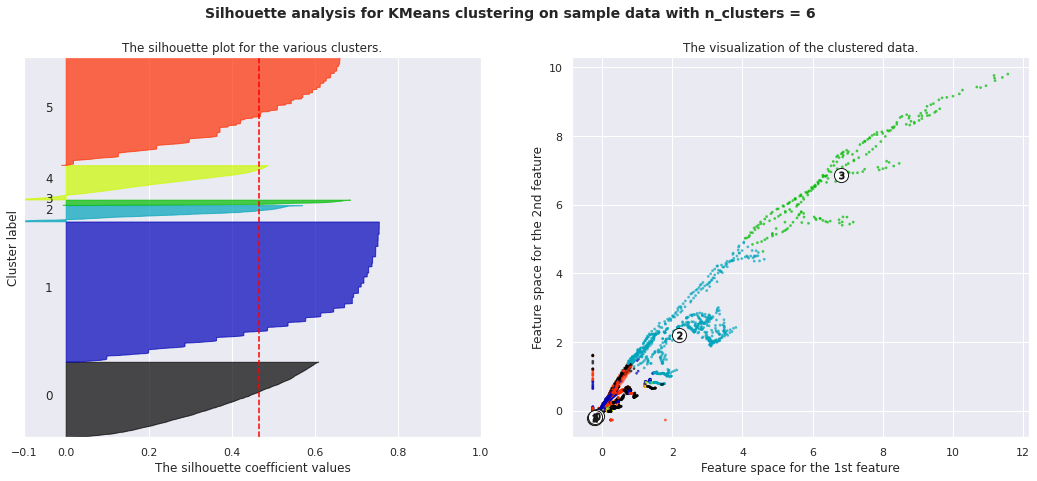

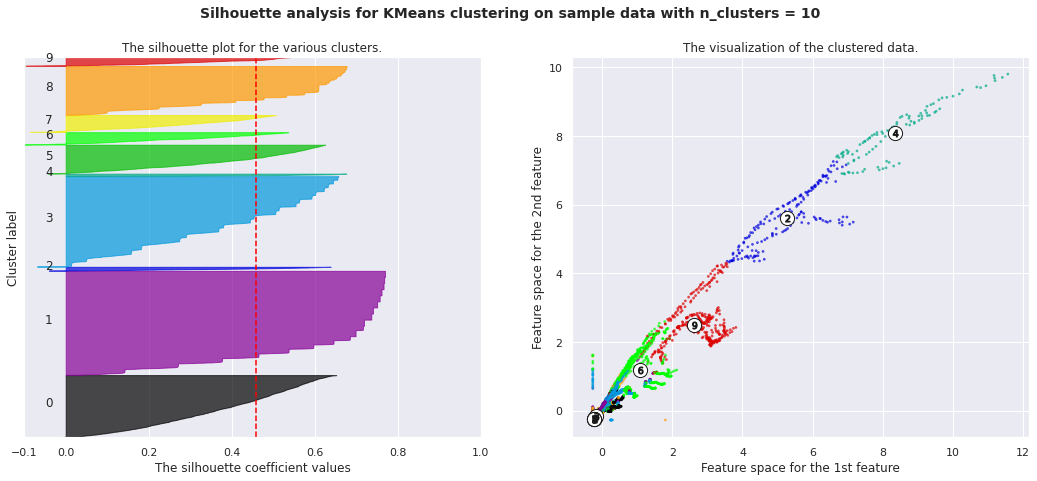

In [29]:
#Sillohuete analysis
range_n_clusters = [2, 3, 4, 5, 6,10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_std) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_std)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_std, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_std, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        df_std[:, 0], df_std[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

#8. Asignar los clusters de K-means al dataset original.

In [46]:
# Crear una instancia de KMeans
kmeans = KMeans(n_clusters=4)

# Entrenar el modelo con los datos
kmeans.fit(dfedu4)

# Añadir la columna 'cluster' al dataset original
dfedu4['cluster'] = kmeans.labels_

# Visualizar los datos agrupados por cluster
print(dfedu4.groupby('cluster').mean())


Indicator Code   SE.PRM.TCHR   SE.PRM.ENRL         Year  SE.XPD.TOTL.GD.ZS
cluster                                                                   
0               7.781744e+06  2.116350e+08  1998.217923           1.878008
1               8.093941e+04  2.216260e+06  1989.727905           1.522572
2               1.964600e+07  5.252016e+08  1997.189655           1.846825
3               2.742003e+06  7.810351e+07  1996.780186           1.923538


<ipython-input-46-f57bee1623e0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfedu4['cluster'] = kmeans.labels_


#9. Describir los clusters usando boxplots y scatters con su respectiva interpretación.

##boxplot del indicador "SE.PRM.TCHR" con el cluster

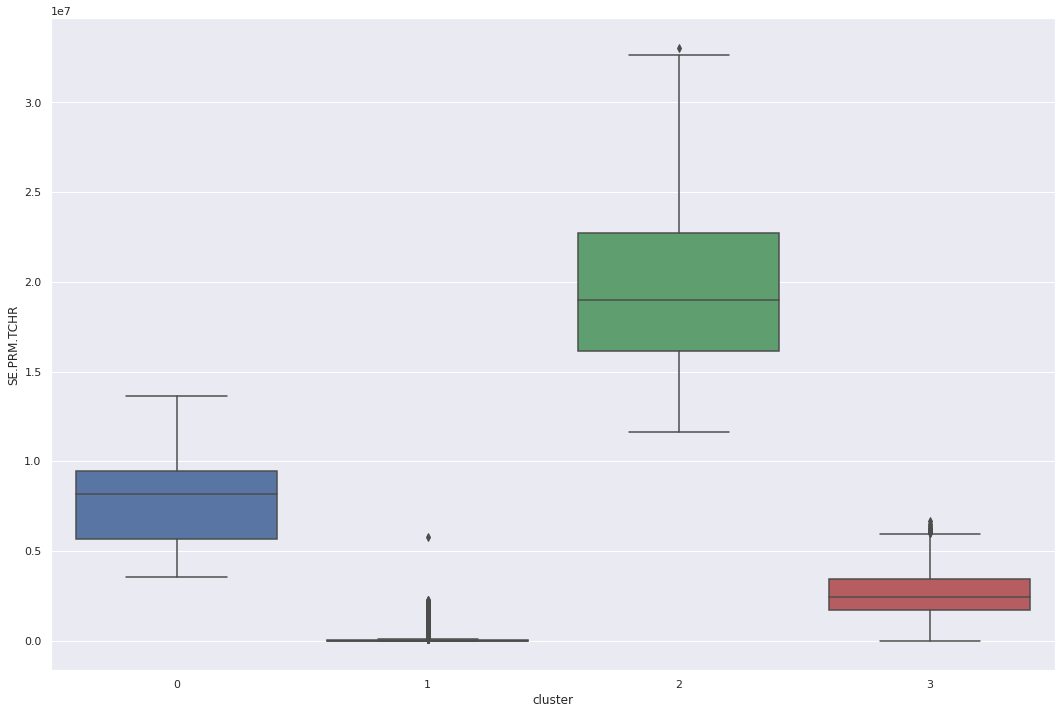

In [58]:
sb.boxplot(x='cluster', y='SE.PRM.TCHR', data=dfedu4)

##boxplot del indicador "SE.PRM.ENRL" con el cluster

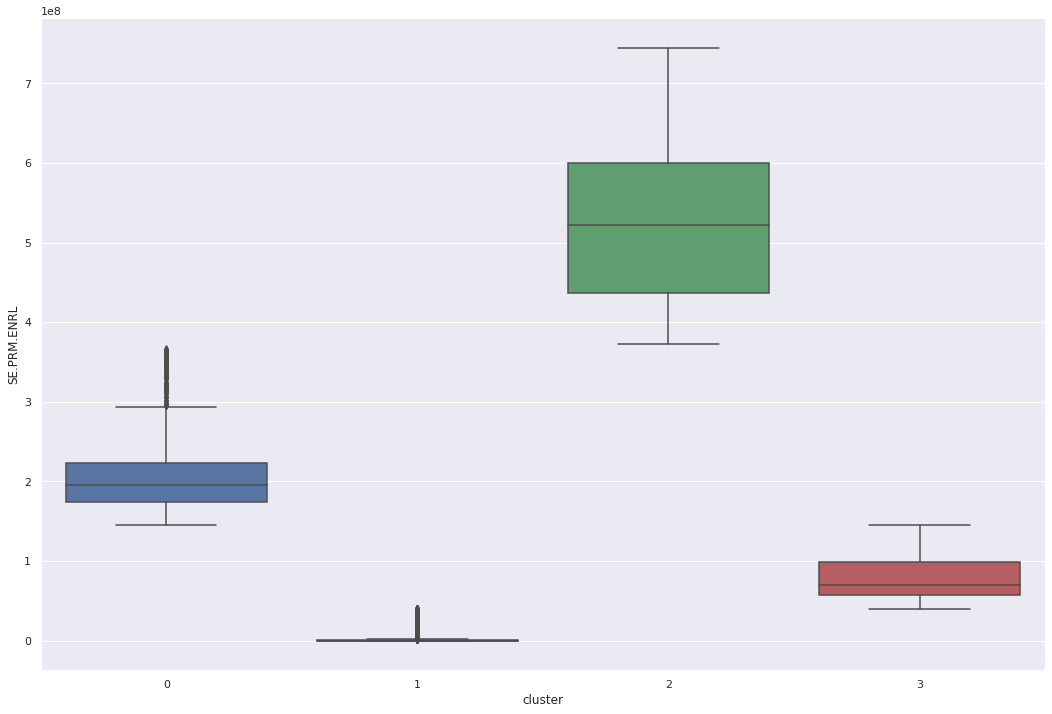

In [60]:
sb.boxplot(x='cluster', y='SE.PRM.ENRL', data=dfedu4)

##scatter del indicador "SE.PRM.TCHR" con el cluster

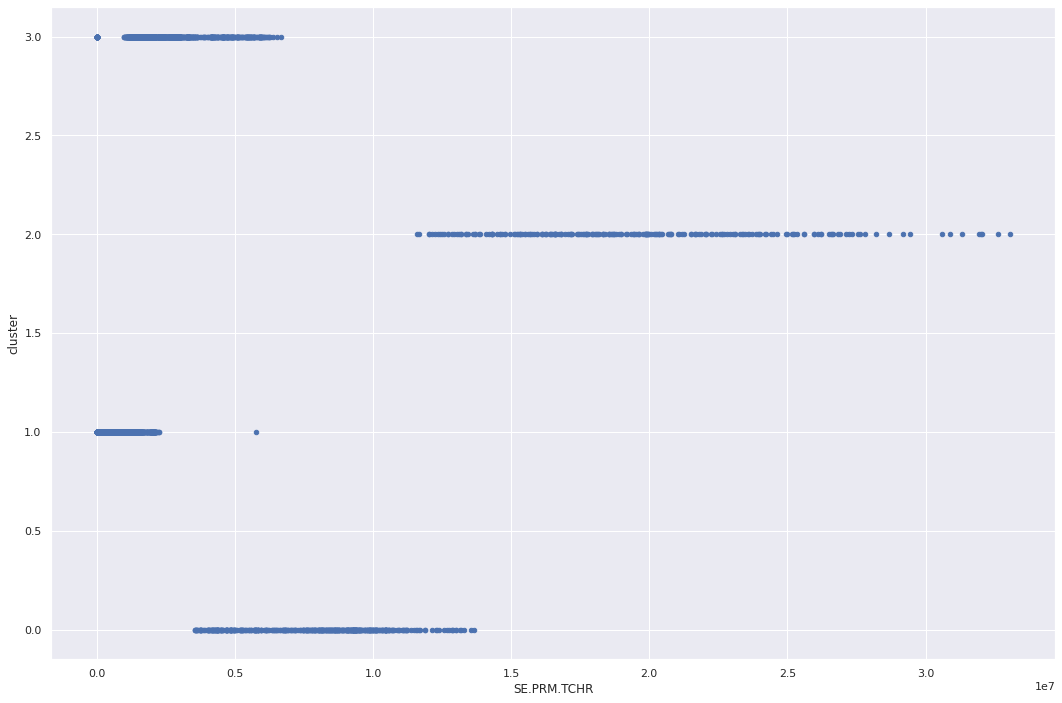

In [47]:
dfedu4.plot.scatter(x='SE.PRM.TCHR',y='cluster')

##scatter del indicador "SE.PRM.ENRL" con el cluster

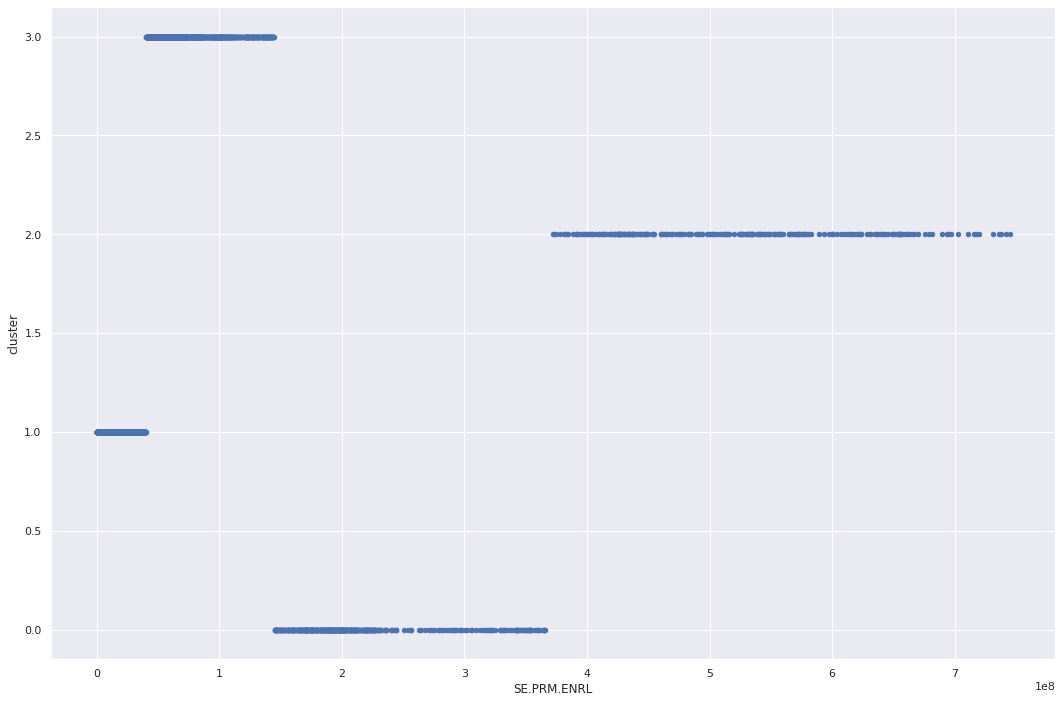

In [48]:
dfedu4.plot.scatter(x='SE.PRM.ENRL',y='cluster')